In [ ]:
#Facebook Prophet is an open-source tool developed by Facebook's Core Data Science team, designed specifically for time series forecasting.
#It's a robust machine-learning model that works well with daily observations that have seasonal patterns as well as holidays
#It can also account for Economic Saturation Point, very helpful for stock predictions
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install prophet #FBprophet was renamed to prophet

In [ ]:
!pip install pandas-datareader
!pip install pandas

import pandas as pd

In [ ]:
#import datetime as dt             #Tried to create csv from web however was returning obejct type error so downloaded package from the internet
#import pandas_datareader as web

#start = dt.datetime(2015, 1, 1)
#end = dt.datetime.now()

#data = web.DataReader("SQ", "yahoo")
#data.to_csv("SQ_data.csv")

##Can collect data from yfinance without creating csv##

import yfinance as yf
import datetime as dt

start = dt.datetime(1997, 1, 1)
end = dt.datetime.now()

#stock = "GOOG"
#blockinc_data = yf.download(stock, start, end)
#blockinc_data.head()

In [ ]:
#blockinc_data = pd.read_csv("MacroTrends_Data_Download_GOOGL.csv")
#blockinc_data.head()

#import pandas_datareader.data as reader
#import matplotlib.pyplot as plt

#df = reader.get_data_yahoo('GOOG', start, end)
#df

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

start = datetime(1997, 1, 1)
end = datetime.now()

# Download the data
df = yf.download('XYZ',start,end)

# Convert df['Close'] to a 1-dimensional Series
close_series = pd.Series(df['Close'].values.flatten(), index=df.index, name='Close')

# Create a new DataFrame with the index as a column
index_df = df.index.to_frame(name='Date')

# Use the join() method to combine the index DataFrame with the Close series
blockinc_data = index_df.join(close_series)

print(blockinc_data)


[*********************100%***********************]  1 of 1 completed

                 Date      Close
Date                            
2015-11-19 2015-11-19  13.070000
2015-11-20 2015-11-20  12.850000
2015-11-23 2015-11-23  12.120000
2015-11-24 2015-11-24  12.020000
2015-11-25 2015-11-25  11.900000
...               ...        ...
2025-01-15 2025-01-15  84.790001
2025-01-16 2025-01-16  86.379997
2025-01-17 2025-01-17  86.959999
2025-01-21 2025-01-21  89.500000
2025-01-22 2025-01-22  87.699997

[2306 rows x 2 columns]


In [ ]:
blockinc_data = blockinc_data[['Date', 'Close']] #Cannot predict data for all columns, only focusing on Date and Closing Price
blockinc_data.head()

blockinc_data.columns = ["ds", "y"]              #renaming MUST BE ds and y not anything else, or else prophet will not understand
blockinc_data

,ds,y
Date,,
2015-11-19,2015-11-19,13.070000
2015-11-20,2015-11-20,12.850000
2015-11-23,2015-11-23,12.120000
2015-11-24,2015-11-24,12.020000
2015-11-25,2015-11-25,11.900000
...,...,...
2025-01-15,2025-01-15,84.790001
2025-01-16,2025-01-16,86.379997
2025-01-17,2025-01-17,86.959999


In [ ]:
#Import Prohpet, Pass Dataframe, Train Model, Finally Predict Stocks
#Prophet is much easier than training model manually (is done in different project)

#Prophet Model Fitting
from prophet import Prophet
prophet_model = Prophet(daily_seasonality=True) #daily values not hours or months
prophet_model.fit(blockinc_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0e4jo5z/srs3o7a1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0e4jo5z/2c7ubegj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48048', 'data', 'file=/tmp/tmpu0e4jo5z/srs3o7a1.json', 'init=/tmp/tmpu0e4jo5z/2c7ubegj.json', 'output', 'file=/tmp/tmpu0e4jo5z/prophet_modelg2sxahaw/prophet_model-20250122205033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:50:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:50:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Predictions Data Plot
future_dates = prophet_model.make_future_dataframe(periods=365)
predictions = prophet_model.predict(future_dates)

from prophet.plot import plot_plotly
plot_plotly(prophet_model, predictions)

In [ ]:
#Data Testing with Data Split from Previous Years

unknown_SQ_data = blockinc_data.iloc[-90:]         #training data from all but last 90 days
known_future_SQ_data = blockinc_data.iloc[:-90]    #testing data from last 90 days

prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(known_future_SQ_data)

future_SQ_data = prophet_model.make_future_dataframe(periods=365) #Predicited future data including the 90 days that we know to compare using dataframes
predictions_SQ_data = prophet_model.predict(future_SQ_data)

plot_plotly(prophet_model, predictions_SQ_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0e4jo5z/1e2kjnbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0e4jo5z/r8aracii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63024', 'data', 'file=/tmp/tmpu0e4jo5z/1e2kjnbn.json', 'init=/tmp/tmpu0e4jo5z/r8aracii.json', 'output', 'file=/tmp/tmpu0e4jo5z/prophet_modelaza_od38/prophet_model-20250122205047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:50:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:50:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


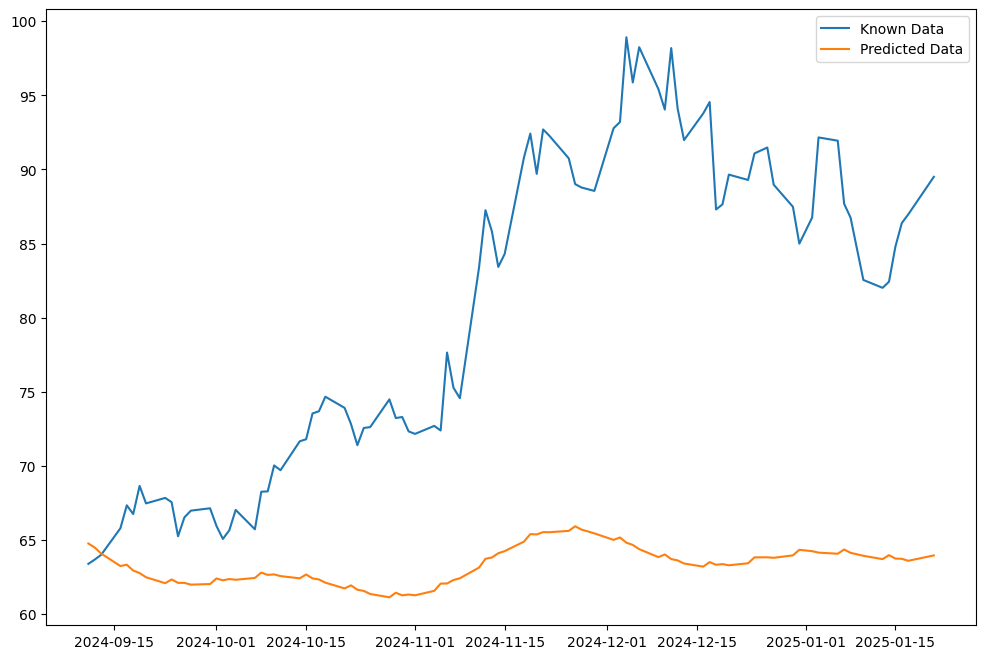

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

predicted_dates = predictions_SQ_data[predictions_SQ_data['ds'].isin(unknown_SQ_data['ds'])]     #need to ensure that the dates the new plot is consistent with the original chart and not skipping 365 days and is not coninciding with chart

plt.plot(pd.to_datetime(unknown_SQ_data['ds']), unknown_SQ_data['y'], label='Known Data')
plt.plot(pd.to_datetime(predicted_dates['ds']), predicted_dates['yhat'], label='Predicted Data')

plt.legend()

In [ ]:
#The data shows slight bumps and growth in accordance to real data, however does have level of error associated with results.
#https://www.youtube.com/watch?v=03H2_ekdv2I

In [ ]:
#Evaluating Model with Error Metrics

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(unknown_SQ_data['y'], predicted_dates['yhat']))
mae = mean_absolute_error(unknown_SQ_data['y'], predicted_dates['yhat'])
r2 = r2_score(unknown_SQ_data['y'], predicted_dates['yhat'])

# Print error metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") #.2f is 2 decimal points
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 19.61
Mean Absolute Error (MAE): 16.95
R-squared (R2) Score: -2.33


In [ ]:
#We can see that the model has about 16.79% MAE.